In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import rwi

In [88]:
def load_df(name):
    eurusd_df = pd.read_csv(name)
    eurusd_df = eurusd_df.rename(columns={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<TIME>':'Time', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
    eurusd_df[['Date']] = pd.to_datetime(eurusd_df['Date'].astype('str'), yearfirst=True)
    eurusd_df =eurusd_df.sort_values(by=['Date', 'Time'])
    eur_df = eurusd_df[['Date', 'Time', 'Close', 'Open', 'High', 'Low', 'Vol']].rename(columns={'Close':'Close'})
    eur_df['Change'] = eur_df['Close'].pct_change()
    eur_df.dropna(inplace=True)
    #eur_df = eur_df[eur_df.Date>'2020-01-01']
    #eur_df = eur_df.set_index('Date')
    return eur_df

In [89]:
name='../dataset/eurusd_fxcm/eurusd_1d.csv'
eur_df = load_df(name)
eur_df = eur_df.set_index('Date')
eur_df.drop(columns=['Time'], inplace=True)

In [90]:
eur_df_all = eur_df.copy()

In [5]:
eur_df = eur_df.iloc[:-772]

In [6]:
test_df = eur_df.iloc[-618:]

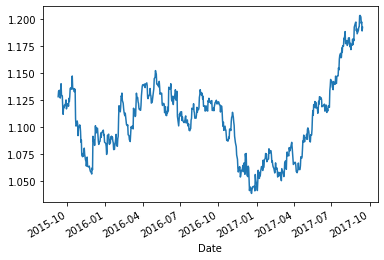

In [7]:
test_df.Close.plot()

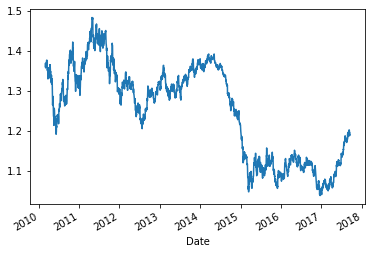

In [8]:
eur_df.Close.plot()

In [9]:
max_val = 0
best_p = 0
for i in range(1, 50):
    res = rwi.momentum_strategy(eur_df, i, 0)
    total_val = res.dropna().val.cumsum().iloc[-1]
    if total_val > max_val:
        max_val = total_val
        best_p = i

In [10]:
max_val

0.32700727984382405

In [11]:
best_p

37

In [45]:
res = rwi.momentum_strategy(eur_df, 1, 0) #37

In [46]:
res.val.cumsum().iloc[-1]

-0.48492240203877734

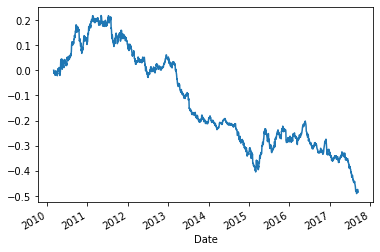

In [47]:
res.val.cumsum().plot()

In [49]:
funct_list = [(rwi.hurstF, 'Close', True), 
              (rwi.hurstF2, 'Close', True),
              (rwi.hurstF3,'Close', False),
              (rwi.hurstF4, 'Close',False),
              
              (rwi.Momersion, 'Change', False),
              (rwi.MomersionDouble,'Change',  False)
             
             
             ]
ind_per = [50, 100, 150, 200, 300, 500, 1000]

range_periods_mom = [0.40,0.45, 0.5, 0.55, 0.60, 0.65, 0.70]
range_periods_rev = [0.35 ,0.40,0.45,0.5,0.55, 0.60]

In [50]:
perf_df = pd.DataFrame(columns=['name', 'ind_per', 'range_per', 'total_val'])

In [51]:
perf = {}

In [52]:
perf_list = []

In [53]:
for ele in funct_list:
    for per in ind_per:
        ind, ser_name, param = ele
        try:
            res['Indicator']= res[[ser_name]].rolling(per).apply(ind, raw=param)
        except:
            print(str(ind.__name__), per, param)
            continue

        for r in  range_periods_mom:
            
            length = len(res[res.Indicator > r].reset_index().val.cumsum())
            if length >= 50:
                total_val = res[(res.Indicator > r) & ((res.val > 0))].val.sum() / res[(res.Indicator > r) & ((res.val < 0))].val.abs().sum()
            perf[str(ind.__name__)+'_'+str(per)+'_'+str(r)] = total_val
            perf_list.append((ind.__name__, per, r, total_val))

C:\Users\lexik\.conda\envs\quant\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


hurstF2 50 True
hurstF3 50 False
hurstF4 50 False


In [48]:
res[res.val > 0].val.sum()/res[res.val < 0].val.abs().sum()

0.900285557297957

In [33]:
len(res[res.Indicator > r].reset_index().val.cumsum())

0

In [ ]:
# higher indicator period, the better higher threshold works

In [54]:
perf

{'hurstF_50_0.4': 0.770493514972127,
 'hurstF_50_0.45': 0.7597363053481908,
 'hurstF_50_0.5': 0.683885530421044,
 'hurstF_50_0.55': 0.7123847009008509,
 'hurstF_50_0.6': 0.7123847009008509,
 'hurstF_50_0.65': 0.7123847009008509,
 'hurstF_50_0.7': 0.7123847009008509,
 'hurstF_100_0.4': 0.9310375528843482,
 'hurstF_100_0.45': 0.8963030897344801,
 'hurstF_100_0.5': 1.062486713859811,
 'hurstF_100_0.55': 0.9140167931412898,
 'hurstF_100_0.6': 0.9140167931412898,
 'hurstF_100_0.65': 0.9140167931412898,
 'hurstF_100_0.7': 0.9140167931412898,
 'hurstF_150_0.4': 0.8382661116849254,
 'hurstF_150_0.45': 0.8612062219079789,
 'hurstF_150_0.5': 0.9421427797891194,
 'hurstF_150_0.55': 1.1243086451601898,
 'hurstF_150_0.6': 1.1243086451601898,
 'hurstF_150_0.65': 1.1243086451601898,
 'hurstF_150_0.7': 1.1243086451601898,
 'hurstF_200_0.4': 0.8506876197854333,
 'hurstF_200_0.45': 0.9111528443132425,
 'hurstF_200_0.5': 0.9729040499812365,
 'hurstF_200_0.55': 0.9729040499812365,
 'hurstF_200_0.6': 0.972

In [98]:
res_test = eur_df_all

In [99]:
res_test = rwi.momentum_strategy(eur_df_all, 1, 0)

In [100]:
res_test[res_test.val > 0].val.sum()/res_test[res_test.val < 0].val.abs().sum()

0.9231394113636409

In [101]:
res_test['Indicator'] = res_test[['Close']].rolling(500).apply(rwi.hurstF2, raw=True)

In [102]:
res_test[(res_test.Indicator >  0.55) & ((res_test.val > 0))].val.sum() / res_test[(res_test.Indicator > 0.55) & ((res_test.val < 0))].val.abs().sum()

1.1875387376380944

In [103]:
res_test[ ((res_test.val > 0))]

,Close,Open,High,Low,Vol,Change,returns,returns2,entry,direction,shift_returns,shift_Change,val,Indicator
Date,,,,,,,,,,,,,,
2010-03-05,1.36194,1.35809,1.36290,1.35297,37976,0.002857,0.00388,-0.01187,-1.0,1.0,0.00165,0.001212,0.001212,NaN
2010-03-08,1.36180,1.36355,1.37034,1.36050,41484,-0.001313,-0.00179,0.00165,-1.0,-1.0,-0.00125,-0.000918,0.000918,NaN
2010-03-10,1.36425,1.36050,1.36784,1.35436,44217,0.002719,0.00370,-0.00125,-1.0,1.0,0.00410,0.003005,0.003005,NaN
2010-03-11,1.36835,1.36426,1.36858,1.36202,40822,0.003005,0.00410,0.00370,1.0,1.0,0.00773,0.005649,0.005649,NaN
2010-03-12,1.37608,1.36837,1.37951,1.36685,42586,0.005649,0.00773,0.00410,1.0,1.0,0.00114,0.000828,0.000828,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17,1.10158,1.11625,1.11887,1.09545,288200,-0.013195,-0.01473,0.00077,-1.0,-1.0,-0.00730,-0.006627,0.006627,0.150909
2020-03-18,1.09428,1.09306,1.09806,1.09299,13202,-0.006627,-0.00730,-0.01473,1.0,-1.0,-0.02885,-0.026364,0.026364,0.147848
2020-03-23,1.07634,1.06888,1.08276,1.06576,360567,0.006979,0.00746,-0.00045,-1.0,1.0,0.00343,0.003187,0.003187,0.128508


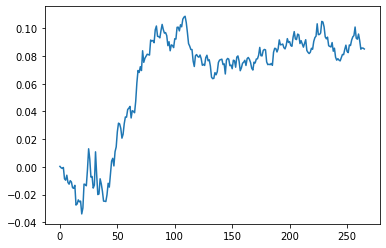

In [109]:
res_test[(res_test.Indicator >  0.55)].reset_index()['val'].cumsum().plot()

In [191]:
res['Indicator'] = res[['Close']].diff().rolling(120).apply(rwi.Momersion, raw=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F478A13748>,
      dtype=object)

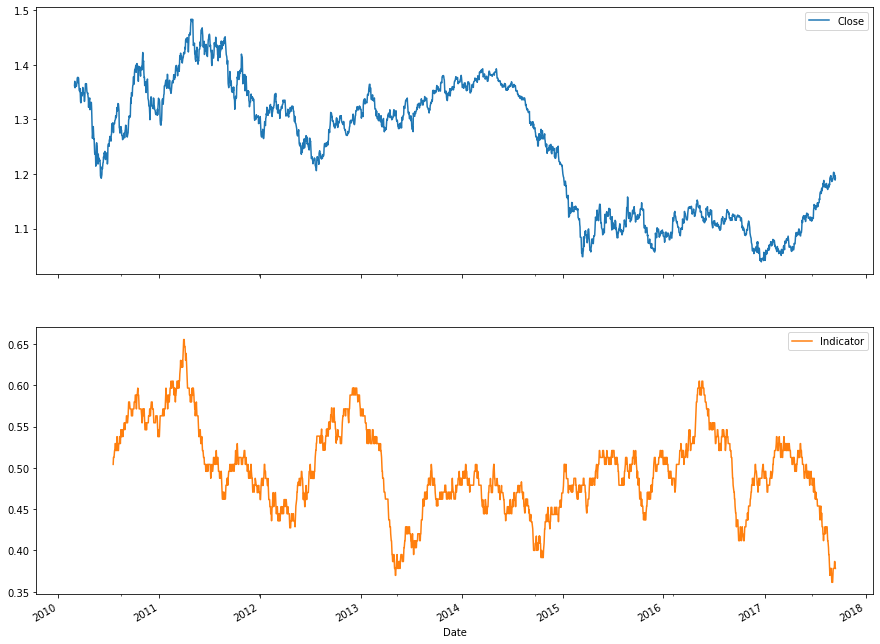

In [192]:
res[['Close', 'Indicator']].plot(subplots=(2,1), figsize=(15,12))

In [186]:
rwi.MomersionDouble(res[['Indicator']].diff().dropna().rename(columns={'Indicator':'returns'}))

0.4554700384826828

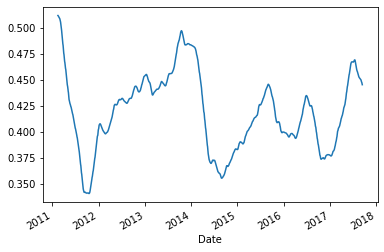

In [159]:
res.Indicator.rolling(200).mean().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F473654C48>],
      dtype=object)

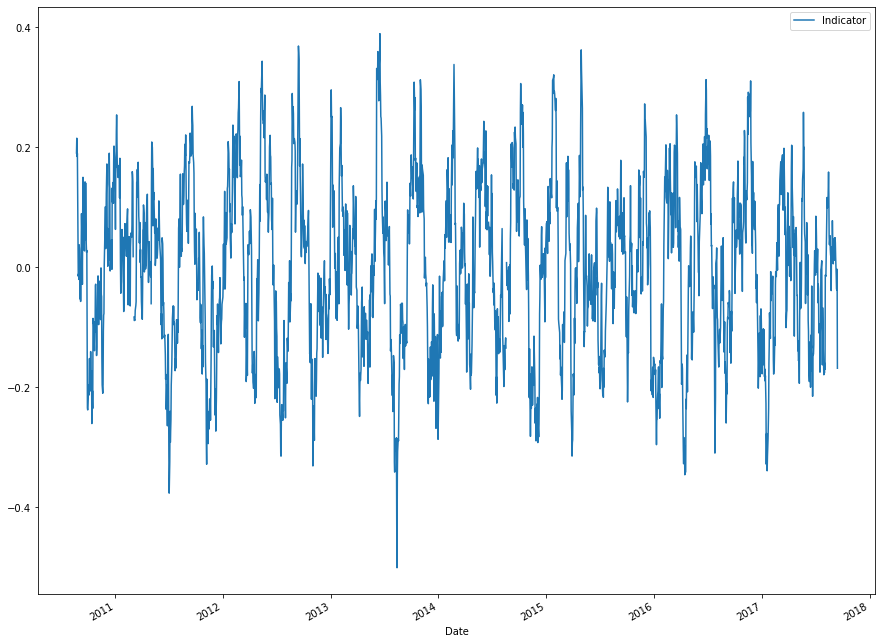

In [117]:
res[[ 'Indicator']].diff(50).plot(subplots=(2,1), figsize=(15,12))

In [66]:
res[(res.Indicator >  0.55) & ((res.val > 0))].val.sum() / res[(res.Indicator > 0.55) & ((res.val < 0))].val.abs().sum()

1.4789676651059758

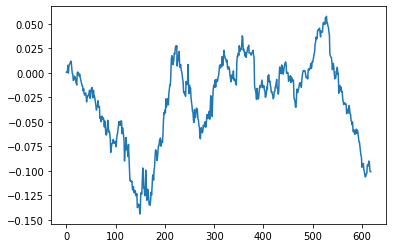

In [71]:
res[(res.Indicator >  0.45)].reset_index().val.cumsum().plot()

In [125]:
df = pd.DataFrame(perf_list).sort_values(by=[3])

In [126]:
df[3] = (df[3]-0.92) #.hist(bins=50)

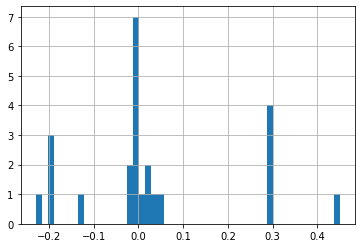

In [135]:
df[(df[2]>0.50) & (df[1]==100)][3].hist(bins=50)

In [56]:
pd.DataFrame(perf_list).corr()

,1,2,3
1,1.000000e+00,-1.688868e-18,-0.104806
2,-1.688868e-18,1.000000e+00,0.110107
3,-1.048057e-01,1.101074e-01,1.000000


In [128]:
total_val

Series([], Name: val, dtype: float64)

In [33]:
res['hurstF_100'] = res[['Close']].rolling(200).apply(rwi.hurstF2, raw=True)

In [34]:
res

,Close,Open,High,Low,Vol,Change,returns,returns2,entry,direction,shift_returns,shift_Change,val,hurstF_100
Date,,,,,,,,,,,,,,
2010-03-02,1.36185,1.35602,1.36206,1.34456,44046,0.004307,0.00000,0.00000,0.0,0.0,0.00000,0.005933,0.000000,NaN
2010-03-03,1.36993,1.36185,1.37350,1.35916,58804,0.005933,0.00000,0.00000,0.0,0.0,0.00000,-0.008665,-0.000000,NaN
2010-03-04,1.35806,1.36993,1.37111,1.35501,54033,-0.008665,0.00000,0.00000,0.0,0.0,0.00000,0.002857,0.000000,NaN
2010-03-05,1.36194,1.35809,1.36290,1.35297,37976,0.002857,0.00000,0.00000,0.0,0.0,0.00000,0.001212,0.000000,NaN
2010-03-07,1.36359,1.36302,1.36446,1.36245,1891,0.001212,0.00000,0.00000,0.0,0.0,0.00000,-0.001313,-0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-10,1.20171,1.20185,1.20255,1.20114,4783,-0.001197,0.00473,0.02541,1.0,1.0,0.00672,-0.004935,-0.004935,0.312427
2017-09-11,1.19578,1.20170,1.20296,1.19479,115191,-0.004935,0.00672,0.01299,1.0,1.0,0.00620,0.001121,0.001121,0.307155
2017-09-12,1.19712,1.19579,1.19782,1.19263,129165,0.001121,0.00620,0.01531,1.0,1.0,0.00263,-0.006950,-0.006950,0.301095


In [23]:
res['Momersion'] = res.Change.rolling(1000).apply(rwi.MomersionDouble, raw=False)

In [25]:
res

,Close,Open,High,Low,Vol,Change,returns,returns2,entry,direction,shift_returns,shift_Change,val,hurstF_100
Date,,,,,,,,,,,,,,
2010-03-02,1.36185,1.35602,1.36206,1.34456,44046,0.004307,0.00000,0.00000,0.0,0.0,0.00000,0.005933,0.000000,NaN
2010-03-03,1.36993,1.36185,1.37350,1.35916,58804,0.005933,0.00000,0.00000,0.0,0.0,0.00000,-0.008665,-0.000000,NaN
2010-03-04,1.35806,1.36993,1.37111,1.35501,54033,-0.008665,0.00000,0.00000,0.0,0.0,0.00000,0.002857,0.000000,NaN
2010-03-05,1.36194,1.35809,1.36290,1.35297,37976,0.002857,0.00000,0.00000,0.0,0.0,0.00000,0.001212,0.000000,NaN
2010-03-07,1.36359,1.36302,1.36446,1.36245,1891,0.001212,0.00000,0.00000,0.0,0.0,0.00000,-0.001313,-0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-10,1.20171,1.20185,1.20255,1.20114,4783,-0.001197,0.00473,0.02541,1.0,1.0,0.00672,-0.004935,-0.004935,NaN
2017-09-11,1.19578,1.20170,1.20296,1.19479,115191,-0.004935,0.00672,0.01299,1.0,1.0,0.00620,0.001121,0.001121,NaN
2017-09-12,1.19712,1.19579,1.19782,1.19263,129165,0.001121,0.00620,0.01531,1.0,1.0,0.00263,-0.006950,-0.006950,NaN


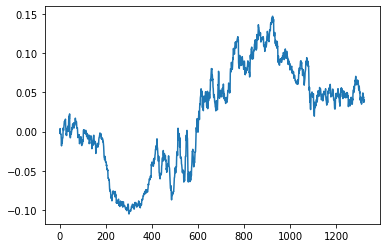

In [94]:
res[res.hurstF_100 >0.30].reset_index().val.cumsum().plot()

In [ ]:
### test crossover ihurst idea
### use ML model to optimize curve based on regime detection indicators

In [ ]:
"""
presentation:

- start with the problem
- introduce the idea of randomness as cause of the problem
- introduce that it is measurable by using indicators
- introduce examples: how ML model accuracy is affected. How basic strategies perform, how random indicators improve strategy
- introduce MA moving strategy on real dataset
- show how random indicators improve MA strategy
- future work

- introduce market regimes


"""